In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/TASK2 dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.isnull().sum())

# Filling the missing values for 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling the missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Dropping the unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
survival_rate = df['Survived'].value_counts(normalize = True)*100

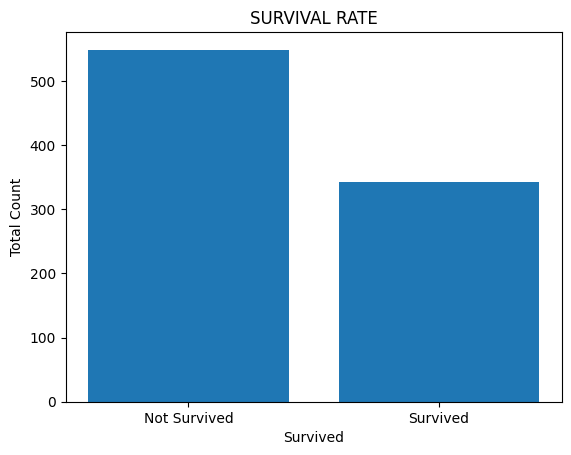

In [5]:
plt.bar(['Not Survived' , 'Survived'], df['Survived'].value_counts())
plt.xlabel('Survived')
plt.ylabel('Total Count')
plt.title('SURVIVAL RATE')
plt.show()

In [6]:
survived_pclass = df.groupby('Pclass')['Survived'].mean()*100
print(f"Survival rate by Pclass:\n{survived_pclass}")

Survival rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


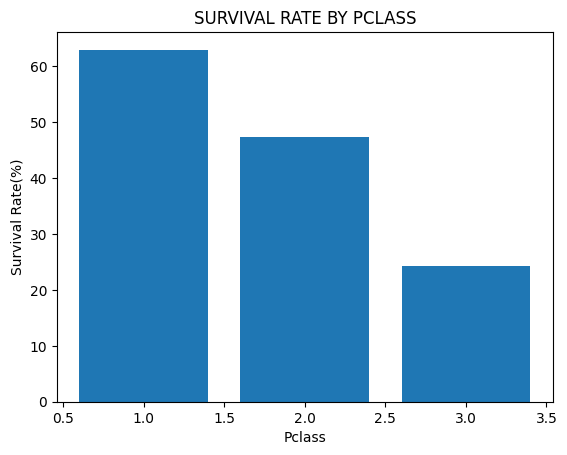

In [7]:
plt.bar(survived_pclass.index, survived_pclass.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate(%)')
plt.title('SURVIVAL RATE BY PCLASS')
plt.show()

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


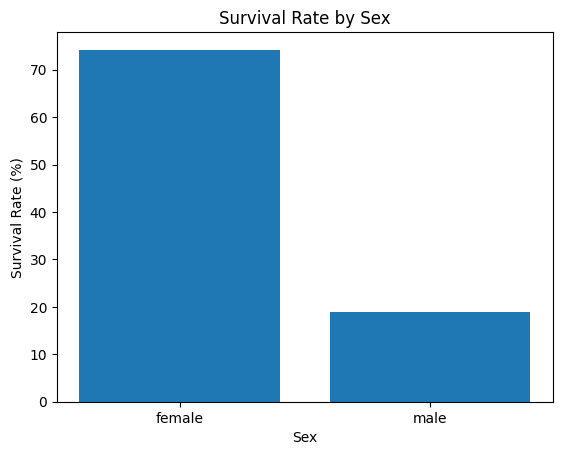

In [8]:
sex_survived = df.groupby('Sex')['Survived'].mean() * 100
print(f"Survival Rate by Sex:\n{sex_survived}")

# Visualizing the relationship between 'Sex' and 'Survived'
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

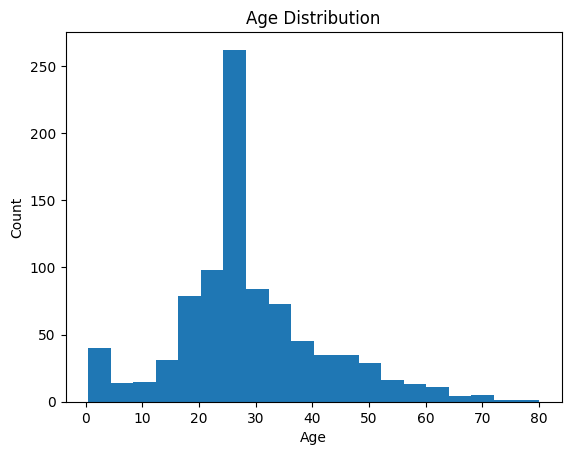

In [9]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

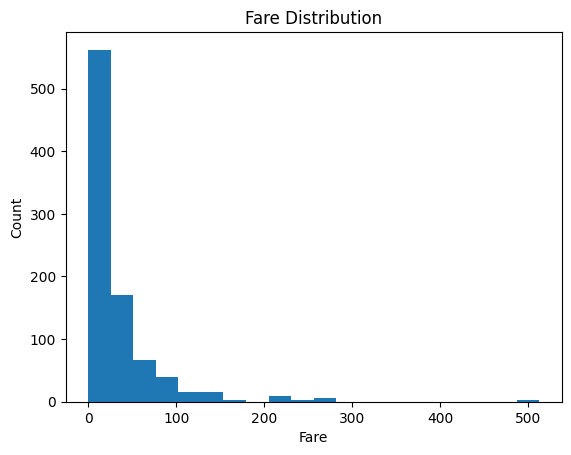

In [10]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()